# Mission: Isolate the Isolation

#### Can we recreate the LJ isolation plots? We really should

## Sample Setup

In [32]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
#plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from analysis.tools import histogram as h
importlib.reload(h)

<module 'analysis.tools.histogram' from '/home/cms-jovyan/SiDM/SIDM/analysis/studies/../../analysis/tools/histogram.py'>

Start with "standard" 2mu2e sample. First just look at which pfjet and ljsource branches are available.

In [33]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset" : sample_name, 
    },
).events()
ak.fields(events)

['run',
 'event',
 'lumi',
 'fixedGridRho',
 'puInteractionNum',
 'trueInteractionNum',
 'weight',
 'weightProduct',
 'HLT_DoubleL2Mu23NoVtx_2Cha',
 'HLT_DoubleL2Mu23NoVtx_2Cha_NoL2Matched',
 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed',
 'HLT_DoubleL2Mu23NoVtx_2Cha_CosmicSeed_NoL2Matched',
 'HLT_DoubleL2Mu25NoVtx_2Cha',
 'HLT_DoubleL2Mu25NoVtx_2Cha_NoL2Matched',
 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed',
 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_NoL2Matched',
 'HLT_DoubleL2Mu25NoVtx_2Cha_Eta2p4',
 'HLT_DoubleL2Mu25NoVtx_2Cha_CosmicSeed_Eta2p4',
 'tomatchfilter_result',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2Cha',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaNoL2Matched',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeed',
 'tomatchfilter_HLTDoubleL2Mu23NoVtx2ChaCosmicSeedNoL2Matched',
 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaEta2p4',
 'tomatchfilter_HLTDoubleL2Mu25NoVtx2ChaCosmicSeedEta2p4',
 'pfMetT0pcT1',
 'pfMetT1',
 'genmet',
 'pfMet',
 'pfMetT0pcT1Txy',
 'dsamuon',
 'gen',
 'electron',
 'pv',
 

In [34]:
ak.fields(events.pfjet.pfcand)

['type',
 'charge',
 'pt',
 'eta',
 'phi',
 'energy',
 'tkD0',
 'tkD0Sig',
 'tkDz',
 'tkDzSig',
 'tkNormChi2',
 'electronIdx',
 'photonIdx',
 'pfmuonIdx',
 'dsamuonIdx',
 'time',
 'timeErr',
 'muonTime',
 'muonTimeErr',
 'muonTimeStd',
 'tkD0Max',
 'tkD0Sub',
 'tkD0Min',
 'tkD0SigMax',
 'tkD0SigSub',
 'tkD0SigMin']

In [35]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
fileset = {
    sample_name: [
        sample_file,
    ],
}

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e_matchedLj",
    ],
    ["base_plus_gen"]
)

output = runner(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

In [52]:
print(output[sample_name].keys())

dict_keys(['cutflow', 'hists'])


In [36]:
hists = output[sample_name]["hists"]
utilities.print_list(hists.keys())

pv_n
pv_ndof
pv_z
pv_rho
electron_n
electron_pt
electron_eta_phi
photon_n
photon_pt
photon_eta_phi
muon_n
muon_pt
muon_eta_phi
dsaMuon_n
dsaMuon_pt
dsaMuon_eta_phi
lj_n
lj_pt
egm_lj_pt
mu_lj_pt
lj0_pt
lj1_pt
lj_eta_phi
lj_electronN
lj_photonN
lj_electronPhotonN
lj_muonN
ljsource_n
ljsource_pt
ljsource_eta_phi
ljsource_charge
ljsource_type
electron_lj_dR
electron_lj_dR_lowRange
photon_lj_dR
photon_lj_dR_lowRange
photon_lj_dR_reallyLowRange
muon_lj_dR
muon_lj_dR_lowRange
dsaMuon_lj_dR
dsaMuon_lj_dR_lowRange
lj_lj_absdphi
lj_lj_invmass
lj_lj_invmass_lowRange
gen_abspid
genE_pt
genE_genE_dR
genE_genE_pt
genMu_pt
genMu_genMu_dR
genMu_genMu_pt
genA_pt
genA_eta_phi
genA_lj_dR
genA_lj_dR_lowRange
genA_genA_dphi
lj_genA_ptRatio
egm_lj_genA_ptRatio
mu_lj_genA_ptRatio


## What is stored in the ntuples?

### General PF content

### Lepton Jet specific content 

#### pjfet / ljs

"pfjet" apparently stores the lepton jet information. This needs to be double checked

In [37]:
ak.fields(events.pfjet)

['chargedHadronE',
 'neutralHadronE',
 'chargedEmE',
 'neutralEmE',
 'photonE',
 'electronE',
 'muonE',
 'hfHadronE',
 'hfEmE',
 'charged_n',
 'neutral_n',
 'chargedHadron_n',
 'neutralHadron_n',
 'photon_n',
 'electron_n',
 'muon_n',
 'area',
 'maxDistance',
 'pfIsolationNoPU05',
 'neuIsolationNoPU05',
 'hadIsolationNoPU05',
 'pfIsolation05',
 'neuIsolation05',
 'hadIsolation05',
 'tkPtSum05',
 'tkPtRawSum05',
 'tkIsolation05',
 'pfIsolationPtNoPU05',
 'pfIsolationPt05',
 'pfIsolationNoPU07',
 'neuIsolationNoPU07',
 'hadIsolationNoPU07',
 'pfIsolation07',
 'neuIsolation07',
 'hadIsolation07',
 'tkPtSum07',
 'tkPtRawSum07',
 'tkIsolation07',
 'pfIsolationPtNoPU07',
 'pfIsolationPt07',
 'tracks_n',
 'ptDistribution',
 'dRSpread',
 'pfiso',
 'mindr',
 'cleaned',
 'averagevtx',
 'medianvtx',
 'p4',
 'pfcand',
 'kinvtx',
 'klmvtx',
 'pfcands']

In [38]:
ak.fields(events.pfjet.pfcand)

['type',
 'charge',
 'pt',
 'eta',
 'phi',
 'energy',
 'tkD0',
 'tkD0Sig',
 'tkDz',
 'tkDzSig',
 'tkNormChi2',
 'electronIdx',
 'photonIdx',
 'pfmuonIdx',
 'dsamuonIdx',
 'time',
 'timeErr',
 'muonTime',
 'muonTimeErr',
 'muonTimeStd',
 'tkD0Max',
 'tkD0Sub',
 'tkD0Min',
 'tkD0SigMax',
 'tkD0SigSub',
 'tkD0SigMin']

In [50]:
plt.hist(ak.count(events.pfjet.pfcand.pt, axis=-1)[:,0], weights=events.weightProduct)
plt.show()

ValueError: in ListOffsetArray64 attempting to get 0, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.3/src/cpu-kernels/awkward_NumpyArray_getitem_next_at.cpp#L21)

In [44]:
events.pfjet.pfcand.pt

<Array [[[29.1, 13.4]], ... 21.6, 16.9]], []] type='18359 * var * var * float64[...'>

In [43]:
ak.flatten(events.pfjet.pfcand.pt)

<Array [[29.1, 13.4], ... [21.6, 16.9]] type='16567 * var * float64[parameters={...'>

TypeError: Can't be used on this type of object: <analysis.tools.histogram.Histogram object at 0x7fad9ffaf9a0>

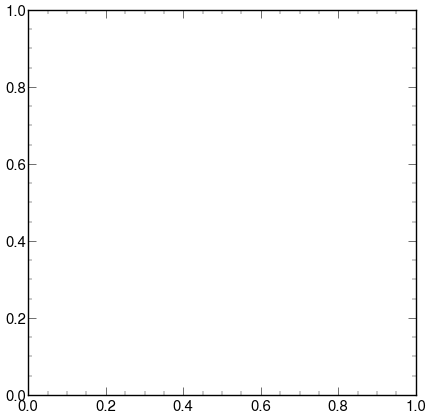

In [30]:
utilities.plot(
h.Histogram(
        [
            h.Axis(hist.axis.Regular(100, 0, 200, name="pfcand_pt"),
                   events.pfjet.pfcand.pt),
        ],
    )
)

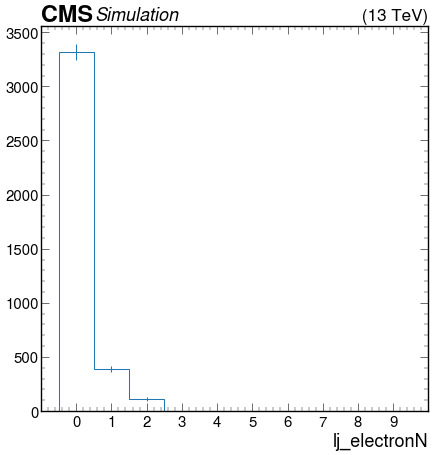

In [25]:
utilities.plot(hists["lj_electronN"]["2mu2e_matchedLj", :])

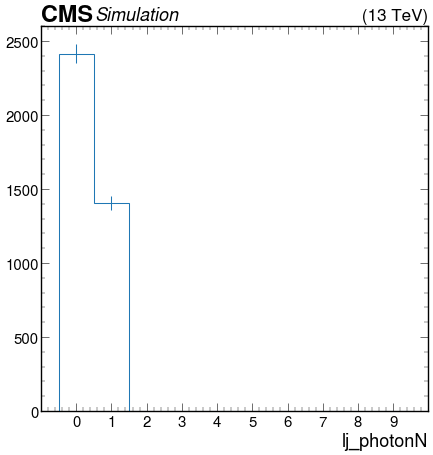

In [26]:
utilities.plot(hists["lj_photonN"]["2mu2e_matchedLj", :])

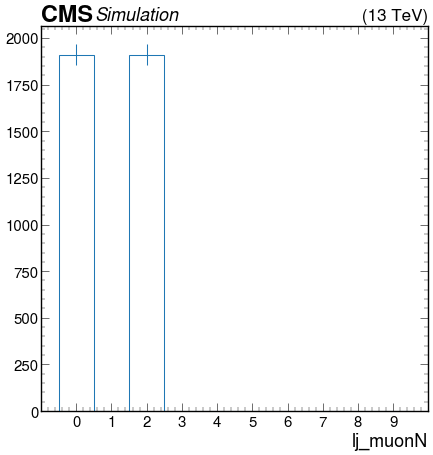

In [27]:
utilities.plot(hists["lj_muonN"]["2mu2e_matchedLj", :])

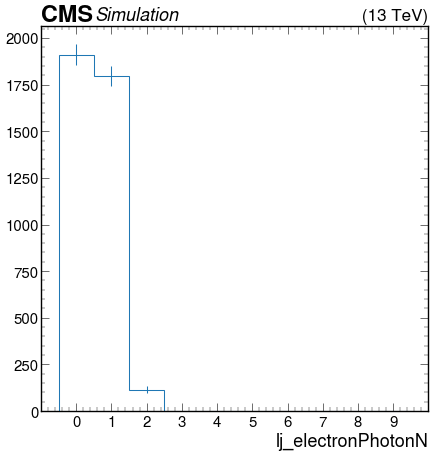

In [28]:
utilities.plot(hists["lj_electronPhotonN"]["2mu2e_matchedLj", :])

Number of electrons, photons, and muons in ljsources seems ballpark reasonable if one remembers that most ljs in this particular sample contain either 2 reco muons or 1 reco photon

#### ljsource

In [13]:
ak.fields(events.ljsource)

['charge', 'type', 'p4']

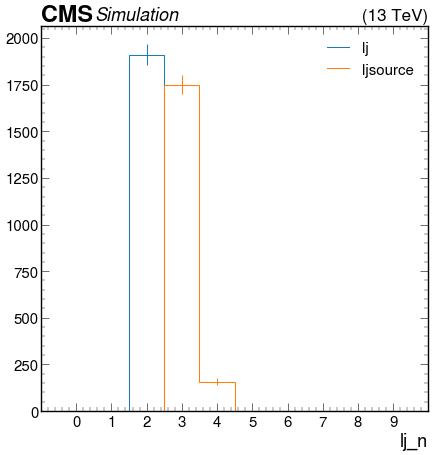

In [14]:
objs = ["lj", "ljsource"]
utilities.plot([hists[f"{obj}_n"]["2mu2e_matchedLj",:] for obj in objs]),
plt.legend(objs)

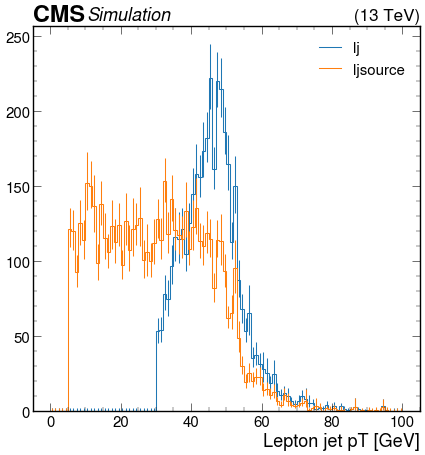

In [15]:
utilities.plot([hists[f"{obj}_pt"]["2mu2e_matchedLj", :] for obj in objs])
plt.legend(objs)

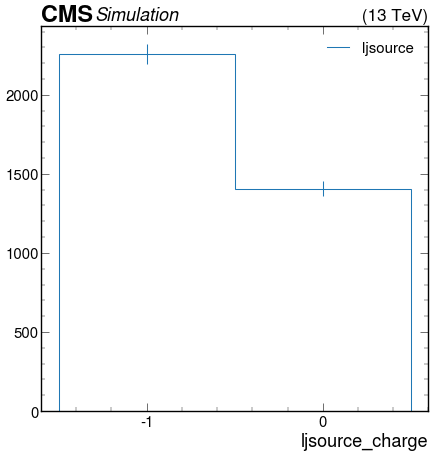

In [20]:
utilities.plot(hists[f"ljsource_charge"]["2mu2e_matchedLj",:])
plt.legend(["ljsource"])

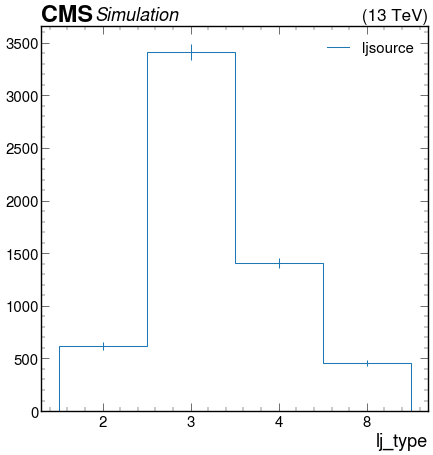

In [21]:
utilities.plot(hists[f"ljsource_type"]["2mu2e_matchedLj",:])
plt.legend(["ljsource"])